In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#import tensorflow as tf

## Business Problem:
A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country

In [2]:
df=pd.read_csv('/Users/vallirajasekar/Downloads/Data.csv')

## Goal & Objective: 
The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts())


Ware_house_ID
WH_100000    1
WH_116650    1
WH_116672    1
WH_116671    1
WH_116670    1
            ..
WH_108331    1
WH_108330    1
WH_108329    1
WH_108328    1
WH_124999    1
Name: count, Length: 25000, dtype: int64
WH_Manager_ID
EID_50000    1
EID_66650    1
EID_66672    1
EID_66671    1
EID_66670    1
            ..
EID_58331    1
EID_58330    1
EID_58329    1
EID_58328    1
EID_74999    1
Name: count, Length: 25000, dtype: int64
Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64
WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64
zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64
WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64
wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64
approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: co

In [6]:
# Attribute                 Description
# ------------------------  --------------------------------------------------
# Ware_house_ID             Product warehouse ID
# Product warehouse ID      Unique identifier for the warehouse
# WH_Manager_ID             Employee ID of the warehouse manager
# Location_type             Location of the warehouse (e.g., city or village)
# WH_capacity_size          Storage capacity size of the warehouse
# zone                      Zone of the warehouse
# WH_regional_zone          Regional zone of the warehouse under each zone
# num_refill_req_l3m        Number of times refilling has been done in the last 3 months
# transport_issue_l1y       Indicator of any transport issues reported in the last year
# Competitor_in_mkt         Number of instant noodles competitors in the market
# retail_shop_num           Number of retail shops selling the product in the warehouse area
# wh_owner_type             Type of warehouse ownership (company-owned or rented)
# distributor_num           Number of distributors working between the warehouse and retail shops
# flood_impacted            Indicator if the warehouse is located in a flood-impacted area
# flood_proof               Indicator if the warehouse is flood-proof
# electric_supply           Indicator if the warehouse has electric backup
# dist_from_hub             Distance between the warehouse and the production hub in kilometers
# workers_num               Number of workers working in the warehouse
# wh_est_year               Year of establishment for the warehouse
# storage_issue_reported_l3m Indicator if the warehouse reported storage issues in the last 3 months
# temp_reg_mach             Indicator if the warehouse has a temperature regulating machine
# approved_wh_govt_certificate Type of standard certificate issued to the warehouse from the government regulatory body
# wh_breakdown_l3m          Number of times the warehouse faced a breakdown in the last 3 months
# govt_check_l3m            Number of times government officers visited the warehouse to check the quality and expiration of stored food in the last 3 months
# product_wg_ton            Weight of the product shipped in the last 3 months (in tons)


In [7]:
df.shape

(25000, 24)

In [8]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
#Missing value in dataset with more than 30% can be removed as it may affect the accuracy 
(df.isnull().sum() / len(df)) * 100


Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [10]:
# wh_est_year               Year of establishment for the warehouse
#We can eliminate the year in above data.
df.drop('wh_est_year',axis=1,inplace=True)
#In case of above workers_num and approved_wh_govt_certificate are the missing,and the missing are of Negligible 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [12]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

In [13]:
df['workers_num'].value_counts()

workers_num
28.0    1491
27.0    1447
29.0    1402
26.0    1290
25.0    1268
24.0    1228
30.0    1202
31.0    1132
32.0    1077
23.0    1077
22.0     959
33.0     916
21.0     826
34.0     796
20.0     783
36.0     671
35.0     670
19.0     590
18.0     559
37.0     506
17.0     445
39.0     419
38.0     417
40.0     381
16.0     328
42.0     298
41.0     240
43.0     212
44.0     204
45.0     175
15.0     155
14.0     104
46.0      91
50.0      73
48.0      71
49.0      65
55.0      50
47.0      47
53.0      45
56.0      40
54.0      39
51.0      30
52.0      29
13.0      24
57.0      24
58.0      20
12.0      15
61.0      14
60.0      10
10.0       5
78.0       5
98.0       5
62.0       5
92.0       5
65.0       5
64.0       5
72.0       5
11.0       5
67.0       5
63.0       5
Name: count, dtype: int64

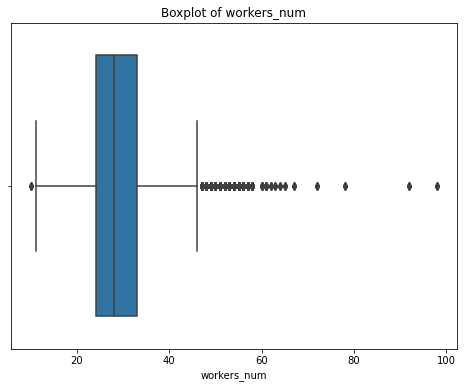

In [14]:
import numpy as np

# Replace infinite values with NaN
#df['workers_num'] = df['workers_num'].replace([np.inf, -np.inf], np.nan)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workers_num')
plt.title('Boxplot of workers_num')
plt.xlabel('workers_num')
plt.show()



In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['workers_num'] = imputer.fit_transform(df[['workers_num']])


In [16]:
from sklearn.impute import KNNImputer

label_mapping = {'A+': 5, 'A': 4, 'B+': 3, 'B': 2, 'C': 1}
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].map(label_mapping)

imputer = KNNImputer(n_neighbors=5)  # Choose the appropriate number of neighbors
df['approved_wh_govt_certificate'] = imputer.fit_transform(df[['approved_wh_govt_certificate']])


In [17]:
#imputer = KNNImputer(n_neighbors=5)  # Choose the appropriate number of neighbors
#df['approved_wh_govt_certificate'] = imputer.fit_transform(df[['approved_wh_govt_certificate']])


In [18]:
#In Below 0 is the Missing value 
#Strategy_1 using KNN Model imputer 

df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
1.000000    5501
3.000000    4917
2.000000    4812
4.000000    4671
5.000000    4191
2.885398     908
Name: count, dtype: int64

In [19]:

df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [20]:
# We can conclude that each warehouse are unique and each Warehouse has one Manger 

print(df['Ware_house_ID'].nunique())
print(df['WH_Manager_ID'].nunique())

25000
25000


In [21]:
#Dropping both the 
df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [22]:
#No Duplicate available in the dataset 
df.duplicated().sum()

0

In [23]:
df_main=df.copy()

In [24]:
#Only two location available, so we can go for one hot Encoding 
df['Location_type'].value_counts()

Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64

In [25]:
df = pd.get_dummies(df, columns=['Location_type'])


In [26]:
#Only three capacity_size available, so we can go for one hot Encoding 
#We can also try for Label Encoding, In this Scenerio

df['WH_capacity_size'].value_counts()

WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64

In [27]:
label_mapping = {'Large': 3, 'Mid': 2, 'Small': 1}
df['WH_capacity_size'] = df['WH_capacity_size'].map(label_mapping)


In [28]:

df['zone'].value_counts()

zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64

In [29]:
df = pd.get_dummies(df, columns=['zone'])


In [30]:
df['WH_regional_zone'].value_counts()

WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['WH_regional_zone'])


In [32]:

df['wh_owner_type'].value_counts()

wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64

In [33]:
df = pd.get_dummies(df, columns=['wh_owner_type'])


In [34]:
df.isnull().sum()

WH_capacity_size                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Location_type_Rural             0
Location_type_Urban             0
zone_East                       0
zone_North                      0
zone_South                      0
zone_West                       0
WH_regional_zone_Zone 1         0
WH_regional_zone_Zone 2         0
WH_regional_zone_Zone 3         0
WH_regional_zone_Zone 4         0
WH_regional_zone_Zone 5         0
WH_regional_zone_Zone 6         0
wh_owner_type_

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_capacity_size              25000 non-null  int64  
 1   num_refill_req_l3m            25000 non-null  int64  
 2   transport_issue_l1y           25000 non-null  int64  
 3   Competitor_in_mkt             25000 non-null  int64  
 4   retail_shop_num               25000 non-null  int64  
 5   distributor_num               25000 non-null  int64  
 6   flood_impacted                25000 non-null  int64  
 7   flood_proof                   25000 non-null  int64  
 8   electric_supply               25000 non-null  int64  
 9   dist_from_hub                 25000 non-null  int64  
 10  workers_num                   25000 non-null  float64
 11  storage_issue_reported_l3m    25000 non-null  int64  
 12  temp_reg_mach                 25000 non-null  int64  
 13  a

In [36]:
df.corr()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
WH_capacity_size,1.000000,0.007054,-0.011046,-0.014475,-0.068853,0.001268,-0.008304,0.001003,0.009338,0.001837,...,-0.158588,-0.011182,-0.488441,-0.105654,-0.103988,-0.129031,0.500713,0.118368,-0.000436,0.000436
num_refill_req_l3m,0.007054,1.000000,0.018549,0.002985,-0.001186,0.003995,-0.010548,-0.001123,-0.007959,0.000048,...,-0.003082,0.010150,-0.015473,-0.001653,0.005838,0.006507,-0.001008,0.001871,-0.010474,0.010474
transport_issue_l1y,-0.011046,0.018549,1.000000,-0.005826,-0.001826,0.008993,-0.009596,0.000022,-0.009299,0.014336,...,0.000448,-0.006381,0.005812,-0.010360,0.004181,0.007610,-0.004297,-0.001607,-0.003617,0.003617
Competitor_in_mkt,-0.014475,0.002985,-0.005826,1.000000,-0.156943,-0.001492,0.009338,-0.003444,0.001759,0.008407,...,-0.302852,0.308257,-0.004469,-0.072817,0.019619,0.053246,-0.024166,0.016949,0.006413,-0.006413
retail_shop_num,-0.068853,-0.001186,-0.001826,-0.156943,1.000000,-0.000395,-0.003774,0.007223,-0.009207,0.000429,...,0.018639,-0.062224,0.053580,0.013059,-0.055296,0.017386,-0.031269,0.009205,-0.009599,0.009599
distributor_num,0.001268,0.003995,0.008993,-0.001492,-0.000395,1.000000,0.004611,-0.003409,0.000454,-0.011838,...,-0.004271,0.007174,-0.004097,-0.000716,0.002140,0.002209,0.004555,-0.004060,-0.005745,0.005745
flood_impacted,-0.008304,-0.010548,-0.009596,0.009338,-0.003774,0.004611,1.000000,0.107015,0.164815,0.000749,...,-0.001078,-0.008524,0.009977,-0.003680,-0.008336,0.009041,-0.006690,0.000697,0.108273,-0.108273
flood_proof,0.001003,-0.001123,0.000022,-0.003444,0.007223,-0.003409,0.107015,1.000000,0.114811,-0.005315,...,0.002174,0.005162,-0.010402,-0.005934,0.008589,0.006994,0.000621,-0.001733,0.030066,-0.030066
electric_supply,0.009338,-0.007959,-0.009299,0.001759,-0.009207,0.000454,0.164815,0.114811,1.000000,-0.002701,...,-0.005236,0.000052,0.000849,-0.010775,0.008583,-0.010646,0.007160,0.003624,0.229841,-0.229841
dist_from_hub,0.001837,0.000048,0.014336,0.008407,0.000429,-0.011838,0.000749,-0.005315,-0.002701,1.000000,...,0.005509,0.004338,-0.005608,-0.003927,-0.003012,0.008372,0.003479,-0.001481,0.001972,-0.001972


In [37]:
X=df.drop(['product_wg_ton'],axis=1)
y=df['product_wg_ton']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [40]:
# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


In [41]:
# Calculate MSE, MAPE, MAE
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)

# Calculate R2 and adjusted R2
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [42]:
# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)


Mean Squared Error (MSE): 3059226.78017036
Mean Absolute Percentage Error (MAPE): 8.875213287572846
Mean Absolute Error (MAE): 1280.133732297105
R-squared (R2): 0.9774147025470384
Adjusted R-squared (Adj R2): 0.9773322644251758


## DecisionTreeRegressor

In [43]:
from sklearn.tree import DecisionTreeRegressor


In [44]:
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)


In [45]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
adj_r2_dt = 1 - (1 - r2_dt) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [46]:
# Print the metrics
print("Decision Tree - Mean Squared Error (MSE):", mse_dt)
print("Decision Tree - Mean Absolute Percentage Error (MAPE):", mape_dt)
print("Decision Tree - Mean Absolute Error (MAE):", mae_dt)
print("Decision Tree - R-squared (R2):", r2_dt)
print("Decision Tree - Adjusted R-squared (Adj R2):", adj_r2_dt)


Decision Tree - Mean Squared Error (MSE): 1767084.3135757577
Decision Tree - Mean Absolute Percentage Error (MAPE): 5.822443834367867
Decision Tree - Mean Absolute Error (MAE): 880.8294545454545
Decision Tree - R-squared (R2): 0.9869541790411667
Decision Tree - Adjusted R-squared (Adj R2): 0.9869065607629376


## RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor


In [48]:
# Create an instance of RandomForestRegressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)


In [49]:
# Calculate MSE, MAPE, MAE
mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Calculate R2 and adjusted R2
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [50]:
# Print the metrics
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - Mean Absolute Percentage Error (MAPE):", mape_rf)
print("Random Forest - Mean Absolute Error (MAE):", mae_rf)
print("Random Forest - R-squared (R2):", r2_rf)
print("Random Forest - Adjusted R-squared (Adj R2):", adj_r2_rf)


Random Forest - Mean Squared Error (MSE): 934665.0621473939
Random Forest - Mean Absolute Percentage Error (MAPE): 4.688018781655244
Random Forest - Mean Absolute Error (MAE): 708.0827296969697
Random Forest - R-squared (R2): 0.9930996653846257
Random Forest - Adjusted R-squared (Adj R2): 0.9930744786175663


## AdaBoostRegressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor


In [52]:
adaboost_model = AdaBoostRegressor()

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(X_test)


In [53]:
# Calculate MSE, MAPE, MAE
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
mape_adaboost = np.mean(np.abs((y_test - y_pred_adaboost) / y_test)) * 100
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

# Calculate R2 and adjusted R2
r2_adaboost = r2_score(y_test, y_pred_adaboost)
adj_r2_adaboost = 1 - (1 - r2_adaboost) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [54]:
# Print the metrics
print("AdaBoost - Mean Squared Error (MSE):", mse_adaboost)
print("AdaBoost - Mean Absolute Percentage Error (MAPE):", mape_adaboost)
print("AdaBoost - Mean Absolute Error (MAE):", mae_adaboost)
print("AdaBoost - R-squared (R2):", r2_adaboost)
print("AdaBoost - Adjusted R-squared (Adj R2):", adj_r2_adaboost)

AdaBoost - Mean Squared Error (MSE): 2975485.397370721
AdaBoost - Mean Absolute Percentage Error (MAPE): 10.322726217395356
AdaBoost - Mean Absolute Error (MAE): 1375.1620650476793
AdaBoost - R-squared (R2): 0.9780329385182687
AdaBoost - Adjusted R-squared (Adj R2): 0.9779527570065942


## XGBRegressor

In [55]:
import xgboost as xgb


In [56]:
# Create an instance of XGBRegressor
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)


In [57]:
# Calculate MSE, MAPE, MAE
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate R2 and adjusted R2
r2_xgb = r2_score(y_test, y_pred_xgb)
adj_r2_xgb = 1 - (1 - r2_xgb) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [58]:
# Print the metrics
print("XGBoost - Mean Squared Error (MSE):", mse_xgb)
print("XGBoost - Mean Absolute Percentage Error (MAPE):", mape_xgb)
print("XGBoost - Mean Absolute Error (MAE):", mae_xgb)
print("XGBoost - R-squared (R2):", r2_xgb)
print("XGBoost - Adjusted R-squared (Adj R2):", adj_r2_xgb)


XGBoost - Mean Squared Error (MSE): 924008.6437671464
XGBoost - Mean Absolute Percentage Error (MAPE): 4.723362368484818
XGBoost - Mean Absolute Error (MAE): 706.793322117661
XGBoost - R-squared (R2): 0.9931783383291949
XGBoost - Adjusted R-squared (Adj R2): 0.993153438724605


## GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor


In [60]:
# Create an instance of GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)


In [61]:
# Calculate MSE, MAPE, MAE
mse_gb = mean_squared_error(y_test, y_pred_gb)
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Calculate R2 and adjusted R2
r2_gb = r2_score(y_test, y_pred_gb)
adj_r2_gb = 1 - (1 - r2_gb) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [62]:
# Print the metrics
print("Gradient Boosting - Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting - Mean Absolute Percentage Error (MAPE):", mape_gb)
print("Gradient Boosting - Mean Absolute Error (MAE):", mae_gb)
print("Gradient Boosting - R-squared (R2):", r2_gb)
print("Gradient Boosting - Adjusted R-squared (Adj R2):", adj_r2_gb)


Gradient Boosting - Mean Squared Error (MSE): 875721.4194412471
Gradient Boosting - Mean Absolute Percentage Error (MAPE): 4.5882712703286845
Gradient Boosting - Mean Absolute Error (MAE): 689.2683074749158
Gradient Boosting - R-squared (R2): 0.9935348275347835
Gradient Boosting - Adjusted R-squared (Adj R2): 0.993511229143987


## Support Vector Machine (SVM) regression model

In [63]:
from sklearn.svm import SVR


In [64]:
# Create an instance of SVR
svm_model = SVR()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)


In [65]:
# Calculate MSE, MAPE, MAE
mse_svm = mean_squared_error(y_test, y_pred_svm)
mape_svm = np.mean(np.abs((y_test - y_pred_svm) / y_test)) * 100
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Calculate R2 and adjusted R2
r2_svm = r2_score(y_test, y_pred_svm)
adj_r2_svm = 1 - (1 - r2_svm) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [66]:
# Print the metrics
print("SVM - Mean Squared Error (MSE):", mse_svm)
print("SVM - Mean Absolute Percentage Error (MAPE):", mape_svm)
print("SVM - Mean Absolute Error (MAE):", mae_svm)
print("SVM - R-squared (R2):", r2_svm)
print("SVM - Adjusted R-squared (Adj R2):", adj_r2_svm)


SVM - Mean Squared Error (MSE): 135459981.77087972
SVM - Mean Absolute Percentage Error (MAPE): 80.19440488859291
SVM - Mean Absolute Error (MAE): 9620.396812638395
SVM - R-squared (R2): -5.792349192645929e-05
SVM - Adjusted R-squared (Adj R2): -0.0037082140022997034


## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge


In [68]:
# Create an instance of Ridge
ridge_model = Ridge()

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)


In [69]:
# Calculate MSE, MAPE, MAE
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calculate R2 and adjusted R2
r2_ridge = r2_score(y_test, y_pred_ridge)
adj_r2_ridge = 1 - (1 - r2_ridge) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [70]:
# Print the metrics
print("Ridge - Mean Squared Error (MSE):", mse_ridge)
print("Ridge - Mean Absolute Percentage Error (MAPE):", mape_ridge)
print("Ridge - Mean Absolute Error (MAE):", mae_ridge)
print("Ridge - R-squared (R2):", r2_ridge)
print("Ridge - Adjusted R-squared (Adj R2):", adj_r2_ridge)


Ridge - Mean Squared Error (MSE): 3059220.067222139
Ridge - Mean Absolute Percentage Error (MAPE): 8.875125329412139
Ridge - Mean Absolute Error (MAE): 1280.1319567978603
Ridge - R-squared (R2): 0.9774147521065982
Ridge - Adjusted R-squared (Adj R2): 0.9773323141656319


## Lasso Regression

In [71]:
from sklearn.linear_model import Lasso


In [72]:
# Create an instance of Lasso
lasso_model = Lasso()

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test)


In [73]:
# Calculate MSE, MAPE, MAE
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

# Calculate R2 and adjusted R2
r2_lasso = r2_score(y_test, y_pred_lasso)
adj_r2_lasso = 1 - (1 - r2_lasso) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


In [74]:
# Print the metrics
print("Lasso - Mean Squared Error (MSE):", mse_lasso)
print("Lasso - Mean Absolute Percentage Error (MAPE):", mape_lasso)
print("Lasso - Mean Absolute Error (MAE):", mae_lasso)
print("Lasso - R-squared (R2):", r2_lasso)
print("Lasso - Adjusted R-squared (Adj R2):", adj_r2_lasso)


Lasso - Mean Squared Error (MSE): 3058819.5992631484
Lasso - Mean Absolute Percentage Error (MAPE): 8.872826889026395
Lasso - Mean Absolute Error (MAE): 1280.0301483297865
Lasso - R-squared (R2): 0.9774177086340556
Lasso - Adjusted R-squared (Adj R2): 0.9773352814846483


## Best 5 Features 

In [75]:
# Get feature importances
feature_importances = gb_model.feature_importances_

# Get indices of top 5 features
top_feature_indices = np.argsort(feature_importances)[-5:]

# Get names of top 5 features
top_features = X.columns[top_feature_indices]

# Print the top 5 features
print("Top 5 Features:")
for feature in top_features:
    print(feature)


Top 5 Features:
num_refill_req_l3m
transport_issue_l1y
temp_reg_mach
approved_wh_govt_certificate
storage_issue_reported_l3m


In [76]:
X[['num_refill_req_l3m',
'transport_issue_l1y',
'temp_reg_mach',
'approved_wh_govt_certificate',
'storage_issue_reported_l3m']]

,num_refill_req_l3m,transport_issue_l1y,temp_reg_mach,approved_wh_govt_certificate,storage_issue_reported_l3m
0,3,1,0,4.0,13
1,0,0,0,4.0,4
2,1,0,0,4.0,17
3,7,4,1,5.0,17
4,3,1,0,1.0,18
...,...,...,...,...,...
24995,3,0,1,4.0,22
24996,6,0,0,2.0,10
24997,7,0,0,3.0,23
24998,1,0,0,4.0,18


In [77]:
X_test.head()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,zone_South,zone_West,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented
15050,2,8,0,2,4178,63,0,0,1,234,...,True,False,False,True,False,False,False,False,False,True
9386,3,0,1,2,5123,19,0,0,1,259,...,False,False,False,False,False,False,False,True,True,False
486,2,1,3,8,4212,19,0,0,0,79,...,False,False,False,False,False,True,False,False,False,True
12924,3,0,1,4,4590,45,0,0,1,209,...,False,True,False,False,False,False,True,False,False,True
16897,2,1,0,4,7113,15,0,0,0,136,...,False,True,False,False,False,True,False,False,False,True


In [78]:
X_test_new = X_test

In [79]:
X_test_new['y_pred_gb'] = y_pred

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_2665/3572383871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new['y_pred_gb'] = y_pred


In [80]:
y_pred

array([13570.42303454,  7338.62089186, 33218.01632375, ...,
       12239.30473929, 25695.5725507 , 14983.84867485])

In [81]:
y_test

15050    13119
9386      6140
486      33125
12924    11135
16897    46138
         ...  
20204    39121
14236     8113
24994    11083
14880    23135
9828     15119
Name: product_wg_ton, Length: 8250, dtype: int64

In [82]:
X_test_new['real_value']=y_test

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_2665/1040400840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_new['real_value']=y_test


In [83]:
X_test_new

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,y_pred_gb,real_value
15050,2,8,0,2,4178,63,0,0,1,234,...,False,True,False,False,False,False,False,True,13570.423035,13119
9386,3,0,1,2,5123,19,0,0,1,259,...,False,False,False,False,False,True,True,False,7338.620892,6140
486,2,1,3,8,4212,19,0,0,0,79,...,False,False,False,True,False,False,False,True,33218.016324,33125
12924,3,0,1,4,4590,45,0,0,1,209,...,False,False,False,False,True,False,False,True,11599.722365,11135
16897,2,1,0,4,7113,15,0,0,0,136,...,False,False,False,True,False,False,False,True,43064.357457,46138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20204,3,8,0,4,6125,16,0,0,1,179,...,False,False,False,False,True,False,True,False,40976.363985,39121
14236,3,3,0,2,4546,30,0,0,1,263,...,False,False,False,False,True,False,False,True,8703.695579,8113
24994,2,7,0,3,5242,41,0,0,0,71,...,False,False,False,True,False,False,False,True,12239.304739,11083
14880,3,6,0,6,4884,23,0,0,1,150,...,False,False,False,False,False,True,True,False,25695.572551,23135


In [84]:
(X_test_new['y_pred_gb']-X_test_new['real_value']).max()

4282.929710805009

In [85]:
(X_test_new['y_pred_gb']-X_test_new['real_value']).min()

-12821.90147416911

In [86]:
X_test_new[:50]

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_regional_zone_Zone 1,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,y_pred_gb,real_value
15050,2,8,0,2,4178,63,0,0,1,234,...,False,True,False,False,False,False,False,True,13570.423035,13119
9386,3,0,1,2,5123,19,0,0,1,259,...,False,False,False,False,False,True,True,False,7338.620892,6140
486,2,1,3,8,4212,19,0,0,0,79,...,False,False,False,True,False,False,False,True,33218.016324,33125
12924,3,0,1,4,4590,45,0,0,1,209,...,False,False,False,False,True,False,False,True,11599.722365,11135
16897,2,1,0,4,7113,15,0,0,0,136,...,False,False,False,True,False,False,False,True,43064.357457,46138
11678,1,2,0,1,4921,42,0,0,0,66,...,True,False,False,False,False,False,True,False,35703.027245,38097
12834,3,8,0,4,5198,54,0,0,0,133,...,False,False,False,False,False,True,False,True,16532.530893,16107
13265,3,2,0,3,5836,40,0,0,1,65,...,False,False,False,False,False,True,True,False,29296.547230,29108
12712,2,4,0,3,6646,49,0,0,1,226,...,False,False,False,True,False,False,False,True,27099.376881,29062
12499,3,7,1,2,5536,63,0,0,1,175,...,False,False,False,False,False,True,False,True,6688.648436,6101


In [89]:
X_test_new[['transport_issue_l1y',
'distributor_num',
'storage_issue_reported_l3m',
'temp_reg_mach',
'approved_wh_govt_certificate','wh_breakdown_l3m','y_pred_gb']]

,transport_issue_l1y,distributor_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,y_pred_gb
15050,0,63,9,1,5.0,2,13570.423035
9386,1,19,5,0,4.0,1,7338.620892
486,3,19,27,0,1.0,2,33218.016324
12924,1,45,9,0,4.0,5,11599.722365
16897,0,15,34,0,1.0,2,43064.357457
...,...,...,...,...,...,...,...
20204,0,16,32,0,3.0,2,40976.363985
14236,0,30,6,1,1.0,2,8703.695579
24994,0,41,9,0,2.0,1,12239.304739
14880,0,23,20,0,2.0,2,25695.572551
